# Significant regression coefficients but non-significant bivariate correlations

It is possible to see that a variable feature does not show significant correlation to target, but does have a significant regression coefficient with respect to the target. It is interesting since that means we may filter out variables which have such behavior during feature engineering. This phenomenon has been discussed in an [article](https://stats.stackexchange.com/questions/38180/significant-regression-coefficients-but-non-significant-bivariate-correlations?rq=1). Here we follow the example to explain the idea and explore the properties using Python.

Suppose we have two features: X1 and X2 and target Y ~ X1 + X2.

In [61]:
import numpy as np
import pandas as pd
from scipy import stats

mu = 0.0

X1 = np.random.normal(mu, 10.0, 100)
X2 = np.random.normal(mu, 1.0, 100)
X = pd.DataFrame({'X1': X1, 'X2': X2})
Y = X1 + X2 + np.random.normal(mu, 0.10, 100)

## Pearson's correlation

The pearson's correlation coefficients are 

In [63]:
print 'corr(Y, X1) =', np.corrcoef(Y, X['X1'])[0][1]
print 'corr(Y, X2) =', np.corrcoef(Y, X['X2'])[0][1]
print 'corr(X1, X2) =', np.corrcoef(X['X1'],X['X2'])[0][1]

corr(Y, X1) = 0.995680752007
corr(Y, X2) = 0.138366231792
corr(X1, X2) = 0.0463813420303


Obviously, since Y ~ X1 + X2 + noise, therefore X2 and Y are related. However, the correlation between X2 and Y is going to be small because of the overwhelming variance given by X1; i.e. the variance of X1 is high enough to swamp out the bivariate correlation corr(Y, X2). Furthermore it is obvious to see no significant correlation between X1 and X2.

We can resort to scipy to look for p-value:

In [64]:
print stats.pearsonr(Y, X['X1'])
print stats.pearsonr(Y, X['X2'])
print stats.pearsonr(X['X1'], X['X2'])

(0.99568075200727602, 5.5785651899836957e-103)
(0.13836623179240126, 0.16978972168193315)
(0.046381342030268731, 0.64678801901398963)


Therefore the correlation between X1 and Y is significant. We can also visualize the correlation. X1 shows a significant positive correlation, but X2 does not:

<IPython.core.display.Javascript object>


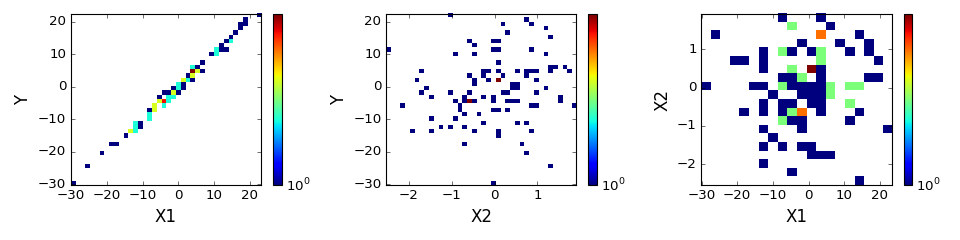

In [65]:
import matplotlib
matplotlib.use("nbagg")
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

#%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (12,3))

ax = plt.subplot(131)
plt.hist2d(X['X1'], Y, bins=40, norm=LogNorm());
plt.xlabel('X1', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.colorbar()

ax = plt.subplot(132)
plt.hist2d(X['X2'], Y, bins=40, norm=LogNorm());
plt.xlabel('X2', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.colorbar()

ax = plt.subplot(133)
plt.hist2d(X['X1'], X['X2'], bins=20, norm=LogNorm());
plt.xlabel('X1', fontsize=15)
plt.ylabel('X2', fontsize=15)
plt.colorbar()

fig.tight_layout()
plt.show()

## Regression only with X1

Obviously, the Y is largely determined by X1, so X1 will have significant regression coefficient:

In [72]:
import statsmodels.api as sm
model = sm.OLS(Y, X['X1']).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.145e+04
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          3.83e-104
Time:                        11:25:12   Log-Likelihood:                -133.95
No. Observations:                 100   AIC:                             269.9
Df Residuals:                      99   BIC:                             272.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X1             1.0039      0.009    107.028      0.000         0.985     1.022
==============================================================================
Omnibus:                        1.875   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.707
Skew:                          -0.319   Prob(JB):                        0.426
Kurtosis:                       2.938   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
predictions = model.predict(X['X1']) # make the predictions by the model
print np.sqrt(np.mean([x**2 for x in predictions-Y]))

0.923666143549


## Regression only with X2

On the other hand, the Y is weakly determined only by X2:

In [73]:
model = sm.OLS(Y, X['X2']).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.947
Date:                Mon, 23 Oct 2017   Prob (F-statistic):              0.166
Time:                        11:25:26   Log-Likelihood:                -370.96
No. Observations:                 100   AIC:                             743.9
Df Residuals:                      99   BIC:                             746.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X2             1.4873      1.066      1.395      0.166        -0.628     3.602
==============================================================================
Omnibus:                        1.036   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                0.555
Skew:                          -0.100   Prob(JB):                        0.758
Kurtosis:                       3.305   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
predictions = model.predict(X['X2']) # make the predictions by the model
print np.sqrt(np.mean([x**2 for x in predictions-Y]))

9.88177056558


We can see the p-value for the regression result is NOT significant. The RMSE is extremely large compared to the regression using X1 only. Thus, during the feature engineering, we may ignore to consider X2 in regression.

## Regression with X1 and X2

Next step we move to another regression with both X1 and X2

In [70]:
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.714e+05
Date:                Mon, 23 Oct 2017   Prob (F-statistic):          6.61e-196
Time:                        11:14:31   Log-Likelihood:                 86.653
No. Observations:                 100   AIC:                            -169.3
Df Residuals:                      98   BIC:                            -164.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X1             0.9995      0.001    961.594      0.000         0.997     1.002
X2             0.9865      0.011     89.340      0.000         0.965     1.008
==============================================================================
Omnibus:                        1.280   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.334
Skew:                           0.256   Prob(JB):                        0.513
Kurtosis:                       2.760   Cond. No.                         10.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
predictions = model.predict(X) # make the predictions by the model
print np.sqrt(np.mean([x**2 for x in predictions-Y]))

0.101726212851


Now we can see the coefficients are capured as one and show significant (small p-values). Meanwhile, the RMSE is small compared to using X1 or X2 only. This arrives at a conclusion that we need to consider both features to get right model. 